Column Names: 

1. **GDP growth (annual %)**: The yearly percentage increase in the country's total economic output, measured at constant local currency prices.

2. **Inflation, consumer prices (annual %)**: The yearly percentage change in the average cost of a fixed basket of consumer goods and services.

3. **Consumer price index (2010 = 100)**: A measure that tracks changes in the cost of a typical basket of goods and services, using 2010 as the base year.

4. **Unemployment, total (% of total labor force)**: The proportion of the labor force actively seeking but not finding employment.

5. **Merchandise imports (current US\$)**: The value of goods brought into a country from abroad, measured in current U.S. dollars.

6. **S\&P Global Equity Indices (annual % change)**: The yearly percentage change in global stock market prices as tracked by S\&P indices.

7. **Foreign direct investment, net inflows (% of GDP)**: The percentage of the country's GDP represented by foreign investments coming into the country.

8. **Final consumption expenditure (% of GDP)**: The proportion of GDP spent on household and government consumption of goods and services.

9. **Tariff rate, applied, weighted mean, all products (%)**: The average tariff rate on all imported products, weighted by the value of each product category.

10. **Tariff rate, applied, weighted mean, manufactured products (%)**: The average tariff rate on imported manufactured products, weighted by the value of each category.

**Task 1: Data Collection and Cleaning**

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Dataset 3.csv')

In [3]:
data.replace('..', np.nan, inplace=True)

In [4]:
# Convert numeric columns to float
for col in data.columns[4:]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [5]:
# Split data by country
countries = data['Country Name'].unique()
country_dfs = {}

In [6]:
for country in countries:
    country_df = data[data['Country Name'] == country].copy()
    # Replace missing values with the median for each column
    for col in country_df.columns[4:]:
        if country_df[col].notna().sum() > 0:
            median_value = country_df[col].median()
        else:
            median_value = 0  # or any default value you deem appropriate
        country_df[col] = country_df[col].fillna(median_value)
    country_dfs[country] = country_df

In [7]:
# Display information about each country's dataframe
for country, df in country_dfs.items():
    print(f'Data for {country}:')
    display(df)  
    print('\n')

Data for China:


,Country Name,Country Code,Time,Time Code,GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Consumer price index (2010 = 100) [FP.CPI.TOTL],"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]",Merchandise imports (current US$) [TM.VAL.MRCH.CD.WT],S&P Global Equity Indices (annual % change) [CM.MKT.INDX.ZG],"Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]",Final consumption expenditure (% of GDP) [NE.CON.TOTL.ZS],"Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]","Tariff rate, applied, weighted mean, manufactured products (%) [TM.TAX.MANF.WM.AR.ZS]"
0,China,CHN,2015,YR2015,7.041329,1.437024,114.922123,4.650,1.679570e+12,-6.007182,2.192178,53.990890,4.52,5.70
1,China,CHN,2016,YR2016,6.848762,2.000002,117.220567,4.560,1.587930e+12,-2.024998,1.555637,55.038738,3.54,4.33
2,China,CHN,2017,YR2017,6.947201,1.593136,119.088050,4.470,1.843790e+12,46.030025,1.349124,54.867608,3.83,4.53
3,China,CHN,2018,YR2018,6.749774,2.074790,121.558878,4.310,2.135750e+12,-20.515480,1.693894,55.057689,3.39,4.29
4,China,CHN,2019,YR2019,5.950501,2.899234,125.083154,4.560,2.078390e+12,19.261354,1.310716,56.018573,2.53,3.13
5,China,CHN,2020,YR2020,2.238638,2.419422,128.109444,5.000,2.065960e+12,27.872233,1.723176,55.330446,2.47,2.74
6,China,CHN,2021,YR2021,8.448469,0.981015,129.366217,4.550,2.679410e+12,-20.647621,1.930786,53.921704,2.31,2.57
7,China,CHN,2022,YR2022,2.950670,1.973576,131.919357,4.980,2.706510e+12,-23.624844,1.063674,53.441939,2.18,2.45
8,China,CHN,2023,YR2023,5.249558,0.234837,132.229152,4.670,2.556570e+12,-4.016090,0.240114,55.637835,2.96,3.71
9,China,CHN,2024,YR2024,6.749774,0.218129,132.517582,4.571,2.078390e+12,-4.016090,1.555637,55.038738,2.96,3.71




Data for Korea, Rep.:


,Country Name,Country Code,Time,Time Code,GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Consumer price index (2010 = 100) [FP.CPI.TOTL],"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]",Merchandise imports (current US$) [TM.VAL.MRCH.CD.WT],S&P Global Equity Indices (annual % change) [CM.MKT.INDX.ZG],"Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]",Final consumption expenditure (% of GDP) [NE.CON.TOTL.ZS],"Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]","Tariff rate, applied, weighted mean, manufactured products (%) [TM.TAX.MANF.WM.AR.ZS]"
10,"Korea, Rep.",KOR,2015,YR2015,2.809103,0.706332,109.827472,3.546,4.364990e+11,-5.012121,0.279945,63.624084,5.72,2.45
11,"Korea, Rep.",KOR,2016,YR2016,2.946882,0.971686,110.894650,3.650,4.061930e+11,2.247828,0.807126,63.195823,8.67,4.65
12,"Korea, Rep.",KOR,2017,YR2017,3.159636,1.944332,113.050811,3.653,4.784780e+11,43.437021,1.103640,62.964446,5.05,2.36
13,"Korea, Rep.",KOR,2018,YR2018,2.907404,1.475839,114.719259,3.824,5.352020e+11,-21.894579,0.706085,64.075100,4.83,2.26
14,"Korea, Rep.",KOR,2019,YR2019,2.243978,0.383000,115.158634,3.746,5.033430e+11,7.219897,0.583394,65.710483,5.48,2.26
15,"Korea, Rep.",KOR,2020,YR2020,-0.709415,0.537288,115.777368,3.931,4.676330e+11,44.139519,0.533043,64.430279,5.48,1.93
16,"Korea, Rep.",KOR,2021,YR2021,4.304735,2.498333,118.669872,3.639,6.150930e+11,-6.966000,1.213155,64.117799,4.85,1.15
17,"Korea, Rep.",KOR,2022,YR2022,2.612672,5.089514,124.709592,2.857,7.313700e+11,-31.384287,1.496174,66.847990,5.66,1.79
18,"Korea, Rep.",KOR,2023,YR2023,1.356733,3.597456,129.195965,2.675,6.425720e+11,-1.382146,0.886178,67.826113,5.48,2.26
19,"Korea, Rep.",KOR,2024,YR2024,2.809103,2.321743,132.195563,2.604,5.033430e+11,-1.382146,0.807126,64.117799,5.48,2.26




Data for Malaysia:


,Country Name,Country Code,Time,Time Code,GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Consumer price index (2010 = 100) [FP.CPI.TOTL],"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]",Merchandise imports (current US$) [TM.VAL.MRCH.CD.WT],S&P Global Equity Indices (annual % change) [CM.MKT.INDX.ZG],"Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]",Final consumption expenditure (% of GDP) [NE.CON.TOTL.ZS],"Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]","Tariff rate, applied, weighted mean, manufactured products (%) [TM.TAX.MANF.WM.AR.ZS]"
20,Malaysia,MYS,2015,YR2015,5.091532,2.104390,112.789535,3.100,1.759710e+11,-20.550544,3.270944,67.048427,3.61,3.865
21,Malaysia,MYS,2016,YR2016,4.449781,2.090567,115.147475,3.440,1.686840e+11,-6.810022,4.471310,67.352607,4.02,4.280
22,Malaysia,MYS,2017,YR2017,5.812722,3.871201,119.605066,3.410,1.954170e+11,25.257146,2.935820,67.584345,3.61,3.865
23,Malaysia,MYS,2018,YR2018,4.843087,0.884709,120.663223,3.300,2.176020e+11,-12.650988,2.314587,69.395263,3.61,3.865
24,Malaysia,MYS,2019,YR2019,4.413187,0.662892,121.463089,3.260,2.049980e+11,-0.990757,2.506977,71.424788,3.61,3.865
25,Malaysia,MYS,2020,YR2020,-5.456847,-1.138702,120.079987,4.540,1.908600e+11,4.177564,1.202755,73.974302,3.60,3.850
26,Malaysia,MYS,2021,YR2021,3.315350,2.477102,123.054491,4.640,2.382400e+11,-8.283373,5.416260,70.644175,3.62,3.880
27,Malaysia,MYS,2022,YR2022,8.861822,3.378699,127.212131,3.930,2.937970e+11,-10.937687,3.686893,69.194926,3.42,3.640
28,Malaysia,MYS,2023,YR2023,3.555487,2.488866,130.378270,3.869,2.657500e+11,-7.546697,1.981110,72.430261,3.61,3.865
29,Malaysia,MYS,2024,YR2024,4.449781,1.834100,132.769538,3.826,2.049980e+11,-7.546697,2.935820,69.395263,3.61,3.865




Data for Mexico:


,Country Name,Country Code,Time,Time Code,GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Consumer price index (2010 = 100) [FP.CPI.TOTL],"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]",Merchandise imports (current US$) [TM.VAL.MRCH.CD.WT],S&P Global Equity Indices (annual % change) [CM.MKT.INDX.ZG],"Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]",Final consumption expenditure (% of GDP) [NE.CON.TOTL.ZS],"Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]","Tariff rate, applied, weighted mean, manufactured products (%) [TM.TAX.MANF.WM.AR.ZS]"
30,Mexico,MEX,2015,YR2015,2.702323,2.720641,119.410675,4.311,4.052820e+11,-14.909294,2.987729,81.050500,4.45,3.75
31,Mexico,MEX,2016,YR2016,1.772493,2.821708,122.780096,3.853,3.975220e+11,-12.127521,3.497423,80.504256,4.35,3.85
32,Mexico,MEX,2017,YR2017,1.871729,6.041457,130.197802,3.419,4.321790e+11,12.859672,2.781069,79.451368,1.24,1.37
33,Mexico,MEX,2018,YR2018,1.972082,4.899350,136.576649,3.275,4.768350e+11,-16.137618,3.013387,78.647308,1.21,1.37
34,Mexico,MEX,2019,YR2019,-0.392691,3.635961,141.542523,3.477,4.671180e+11,9.876383,2.296313,78.229980,1.62,1.78
35,Mexico,MEX,2020,YR2020,-8.354035,3.396834,146.350488,4.440,3.932780e+11,-3.558697,2.812300,78.351564,1.62,1.78
36,Mexico,MEX,2021,YR2021,6.048483,5.689208,154.676672,4.019,5.224550e+11,16.622764,2.690303,79.730473,1.62,1.78
37,Mexico,MEX,2022,YR2022,3.689111,7.896276,166.890369,3.256,6.263240e+11,-3.480543,2.671817,81.870676,1.62,1.78
38,Mexico,MEX,2023,YR2023,3.199981,5.527961,176.116004,2.765,6.214760e+11,-3.519620,1.688760,81.393662,1.62,1.78
39,Mexico,MEX,2024,YR2024,1.972082,4.722256,184.432652,2.711,4.671180e+11,-3.519620,2.781069,79.730473,1.62,1.78




Data for United States:


,Country Name,Country Code,Time,Time Code,GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Consumer price index (2010 = 100) [FP.CPI.TOTL],"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]",Merchandise imports (current US$) [TM.VAL.MRCH.CD.WT],S&P Global Equity Indices (annual % change) [CM.MKT.INDX.ZG],"Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]",Final consumption expenditure (% of GDP) [NE.CON.TOTL.ZS],"Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]","Tariff rate, applied, weighted mean, manufactured products (%) [TM.TAX.MANF.WM.AR.ZS]"
40,United States,USA,2015,YR2015,2.945550,0.118627,108.695722,5.280,2.315300e+12,-0.726602,2.795482,81.450727,1.69,1.740
41,United States,USA,2016,YR2016,1.819451,1.261583,110.067009,4.869,2.250150e+12,9.535016,2.522681,81.788323,1.65,1.680
42,United States,USA,2017,YR2017,2.457622,2.130110,112.411557,4.355,2.408480e+12,19.419965,1.941776,81.614607,1.66,1.570
43,United States,USA,2018,YR2018,2.966505,2.442583,115.157303,3.896,2.614220e+12,-6.237260,1.039454,81.302065,1.59,1.580
44,United States,USA,2019,YR2019,2.583825,1.812210,117.244196,3.669,2.567450e+12,28.878069,1.466965,81.010277,13.78,2.190
45,United States,USA,2020,YR2020,-2.163029,1.233584,118.690502,8.055,2.406930e+12,16.258922,0.641872,81.513648,1.52,1.550
46,United States,USA,2021,YR2021,6.055053,4.697859,124.266414,5.349,2.935310e+12,26.892736,2.009212,82.298422,1.47,1.570
47,United States,USA,2022,YR2022,2.512375,8.002800,134.211206,3.650,3.371750e+12,-19.442824,1.572591,81.737457,1.49,1.610
48,United States,USA,2023,YR2023,2.887556,4.116338,139.735794,3.638,3.172480e+12,12.896969,1.258207,81.335304,1.62,1.595
49,United States,USA,2024,YR2024,2.583825,2.949525,143.857336,4.106,2.567450e+12,12.896969,1.572591,81.513648,1.62,1.595




Data for Viet Nam:


,Country Name,Country Code,Time,Time Code,GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Consumer price index (2010 = 100) [FP.CPI.TOTL],"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]",Merchandise imports (current US$) [TM.VAL.MRCH.CD.WT],S&P Global Equity Indices (annual % change) [CM.MKT.INDX.ZG],"Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]",Final consumption expenditure (% of GDP) [NE.CON.TOTL.ZS],"Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]","Tariff rate, applied, weighted mean, manufactured products (%) [TM.TAX.MANF.WM.AR.ZS]"
50,Viet Nam,VNM,2015,YR2015,6.987154,0.631201,144.550370,1.848,1.656100e+11,-7.159486,4.931908,69.987542,3.140,2.700
51,Viet Nam,VNM,2016,YR2016,6.690009,2.668248,148.407333,1.848,1.748040e+11,-0.603722,4.900893,69.135381,2.860,2.560
52,Viet Nam,VNM,2017,YR2017,6.940190,3.520257,153.631652,1.874,2.129190e+11,56.798386,5.011487,68.132860,2.690,2.470
53,Viet Nam,VNM,2018,YR2018,7.465007,3.539628,159.069641,1.161,2.368620e+11,-6.124146,4.998283,66.822779,4.390,2.290
54,Viet Nam,VNM,2019,YR2019,7.359263,2.795824,163.516948,1.681,2.533930e+11,3.565218,4.821075,66.406906,1.660,1.420
55,Viet Nam,VNM,2020,YR2020,2.865413,3.220934,168.783722,2.103,2.627010e+11,17.698191,4.558362,65.445888,1.340,1.050
56,Viet Nam,VNM,2021,YR2021,2.553729,1.834716,171.880423,2.385,3.324550e+11,37.107494,4.273146,65.104112,1.170,0.880
57,Viet Nam,VNM,2022,YR2022,8.123514,3.156508,177.305841,1.523,3.591480e+11,-46.095759,4.362406,63.719954,1.070,0.820
58,Viet Nam,VNM,2023,YR2023,5.046431,3.252893,183.073410,1.645,3.257760e+11,1.480748,4.305159,63.436669,2.175,1.855
59,Viet Nam,VNM,2024,YR2024,6.940190,3.621093,189.702668,1.431,2.533930e+11,1.480748,4.821075,66.406906,2.175,1.855




Data for Germany:


,Country Name,Country Code,Time,Time Code,GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Consumer price index (2010 = 100) [FP.CPI.TOTL],"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]",Merchandise imports (current US$) [TM.VAL.MRCH.CD.WT],S&P Global Equity Indices (annual % change) [CM.MKT.INDX.ZG],"Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]",Final consumption expenditure (% of GDP) [NE.CON.TOTL.ZS],"Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]","Tariff rate, applied, weighted mean, manufactured products (%) [TM.TAX.MANF.WM.AR.ZS]"
60,Germany,DEU,2015,YR2015,1.652720,0.514426,107.199188,4.612,1.051130e+12,9.560504,1.823214,73.120672,2.020,2.260
61,Germany,DEU,2016,YR2016,2.294711,0.491747,107.726337,4.104,1.055330e+12,6.870049,1.643196,73.002087,2.090,2.120
62,Germany,DEU,2017,YR2017,2.716025,1.509495,109.352460,3.781,1.162910e+12,12.512609,2.890881,72.401392,1.960,2.080
63,Germany,DEU,2018,YR2018,1.116443,1.732169,111.246629,3.384,1.284350e+12,-18.259371,4.004210,72.542340,1.830,1.980
64,Germany,DEU,2019,YR2019,0.987893,1.445660,112.854877,3.163,1.233980e+12,25.476466,1.906987,73.061066,1.840,2.010
65,Germany,DEU,2020,YR2020,-4.095137,0.144878,113.018379,3.881,1.171780e+12,3.545699,4.486666,72.988155,1.480,1.800
66,Germany,DEU,2021,YR2021,3.670000,3.066667,116.484276,3.594,1.421510e+12,15.789159,2.349165,72.380061,1.390,1.430
67,Germany,DEU,2022,YR2022,1.369731,6.872574,124.489744,3.120,1.582600e+12,-12.346791,1.506606,74.482037,1.330,1.640
68,Germany,DEU,2023,YR2023,-0.266438,5.946437,131.892448,3.068,1.476660e+12,8.215276,0.431215,74.321869,1.835,1.995
69,Germany,DEU,2024,YR2024,1.369731,2.256498,134.868599,3.406,1.233980e+12,8.215276,1.906987,73.002087,1.835,1.995


**Task 4: Correlation Analysis**

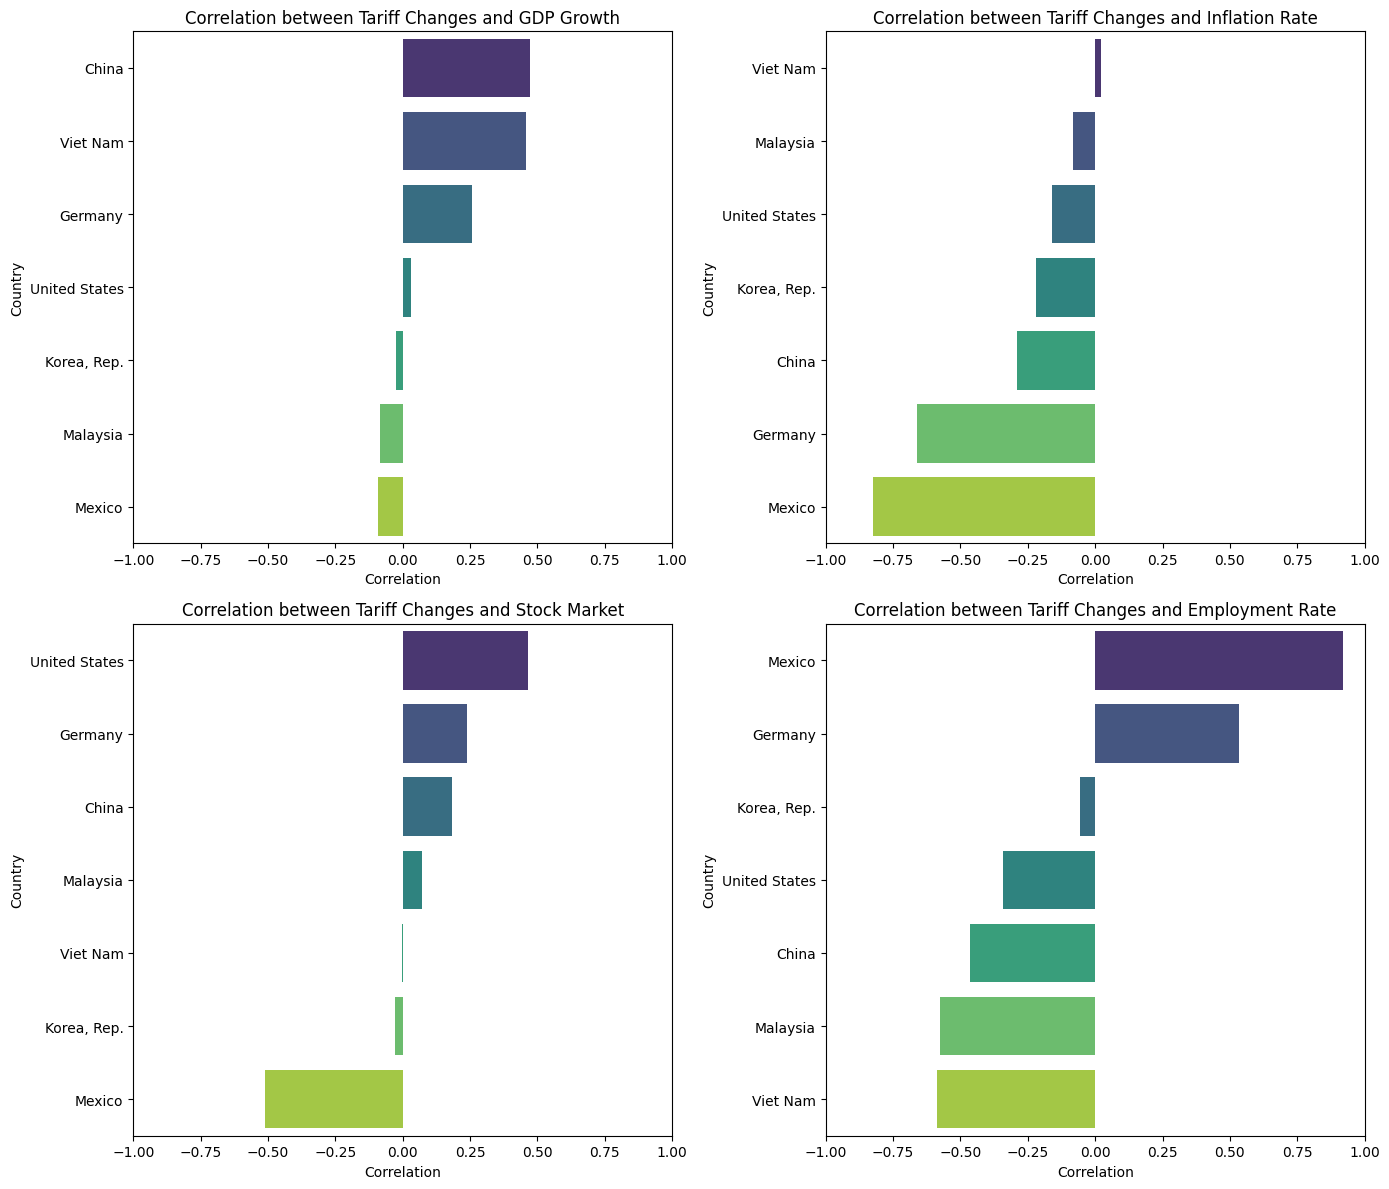

In [8]:
# Prepare the list of economic indicators
indicators = {
    'GDP Growth': 'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]',
    'Inflation Rate': 'Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]',
    'Stock Market': 'S&P Global Equity Indices (annual % change) [CM.MKT.INDX.ZG]',
    'Employment Rate': 'Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]'
}

# Initialize a dictionary to store correlations
indicator_correlations = {indicator: [] for indicator in indicators}

# Group by country and calculate correlations
for country in data['Country Name'].unique():
    country_data = data[data['Country Name'] == country].dropna()
    
    if not country_data.empty:
        for indicator, column_name in indicators.items():
            # Calculate correlation with tariff change
            correlation = country_data[column_name].corr(
                country_data['Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]']
            )
            indicator_correlations[indicator].append((country, correlation))

# Plot the correlations separately for each indicator
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # 2x2 grid for 4 indicators
axes = axes.flatten()

for idx, (indicator, correlations) in enumerate(indicator_correlations.items()):
    # Create DataFrame for the current indicator
    corr_df = pd.DataFrame(correlations, columns=['Country', 'Correlation'])
    corr_df = corr_df.sort_values('Correlation', ascending=False)
    
    # Bar plot for the current indicator
    sns.barplot(data=corr_df, x='Correlation', y='Country', ax=axes[idx], hue='Country', palette='viridis', legend=False)
    axes[idx].set_title(f'Correlation between Tariff Changes and {indicator}')
    axes[idx].set_xlim(-1, 1)  # Correlation range
    axes[idx].set_xlabel('Correlation')
    axes[idx].set_ylabel('Country')

plt.tight_layout()
plt.show()


**Task 5: Predictive Modelling**